A company has n employees with a unique ID for each employee from 0 to n - 1. The head of the company is the one with headID.

Each employee has one direct manager given in the manager array where manager[i] is the direct manager of the i-th employee, manager[headID] = -1. Also, it is guaranteed that the subordination relationships have a tree structure.

The head of the company wants to inform all the company employees of an urgent piece of news. He will inform his direct subordinates, and they will inform their subordinates, and so on until all employees know about the urgent news.

The i-th employee needs informTime[i] minutes to inform all of his direct subordinates (i.e., After informTime[i] minutes, all his direct subordinates can start spreading the news).

Return the number of minutes needed to inform all the employees about the urgent news.

 

Example 1:

Input: n = 1, headID = 0, manager = [-1], informTime = [0]
Output: 0
Explanation: The head of the company is the only employee in the company.

Example 2:

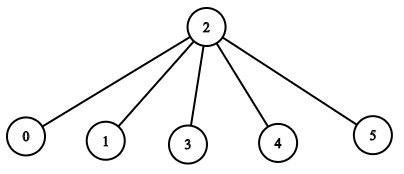

Input: n = 6, headID = 2, manager = [2,2,-1,2,2,2], informTime = [0,0,1,0,0,0]
Output: 1
Explanation: The head of the company with id = 2 is the direct manager of all the employees in the company and needs 1 minute to inform them all.
The tree structure of the employees in the company is shown.

 

Constraints:

    1 <= n <= 105
    0 <= headID < n
    manager.length == n
    0 <= manager[i] < n
    manager[headID] == -1
    informTime.length == n
    0 <= informTime[i] <= 1000
    informTime[i] == 0 if employee i has no subordinates.
    It is guaranteed that all the employees can be informed.



In [ ]:
class Solution:
    def numOfMinutes(self, n: int, headID: int, manager: List[int], informTime: List[int]) -> int:
        adjList = defaultdict(list)
        for i in range(n):
            if manager[i] != -1:
                adjList[manager[i]].append(i)
        
        return self.dfs(headID, informTime, adjList)
        
    def dfs(self, manager, informTime, adjList):
        maxTime = 0
        for subordinate in adjList[manager]:
            maxTime = max(maxTime, self.dfs(subordinate, informTime, adjList))
        return maxTime + informTime[manager]

        